## Preparation

In [31]:
%load_ext watermark
%watermark  -d -u -a 'Christine Hou' -v -p numpy,scipy,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Christine Hou

Last updated: 2021-11-29

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.28.0

numpy     : 1.19.5
scipy     : 1.6.1
matplotlib: 3.3.4
sklearn   : 0.0



In [2]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


# Model Part 1 - Using features.csv

## Input

In [35]:
# feature.csv
X1 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/features.csv",header = None)
y1 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/labels.csv",header = None).values.ravel().astype(int)

print('X1.shape:', X1.shape)
print('y1.shape:', y1.shape)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify = y1)

print('X1_train.shape:', X1_train.shape)
print('y1_train.shape:', y1_train.shape)
print('X1_test.shape:', X1_test.shape)
print('y1_test.shape:', y1_test.shape)

X1_train_sub, X1_valid, y1_train_sub, y1_valid = \
    train_test_split(X1_train, y1_train, test_size=0.2,\
                     random_state=1, stratify=y1_train)

print('X1_valid.shape:', X1_valid.shape)
print('y1_valid.shape:', y1_valid.shape)

X1.shape: (4559, 512)
y1.shape: (4559,)
X1_train.shape: (3191, 512)
y1_train.shape: (3191,)
X1_test.shape: (1368, 512)
y1_test.shape: (1368,)
X1_valid.shape: (639, 512)
y1_valid.shape: (639,)


## 1. KNN

Text(0, 0.5, 'Error rate')

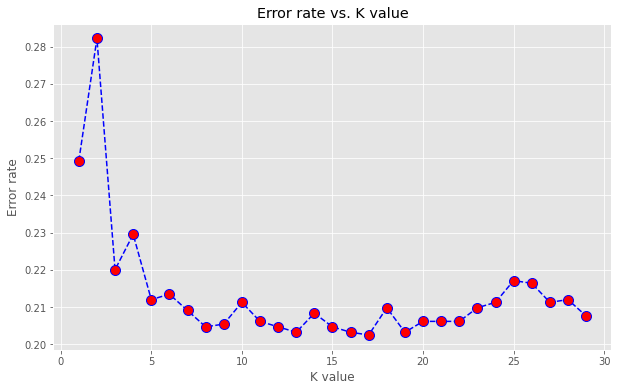

In [64]:
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i != y1_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,30),error,color = "blue",
        linestyle = "dashed",marker = "o",
        markerfacecolor = "red", markersize = 10)

plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [65]:
# Find the index of minimum error in the error list
index = error.index(min(error))
k = index + 1
print(k)

17


In [66]:
# Find the k-value with lowest Error Rate - k
# for example, k = 3
knn_1 = KNeighborsClassifier(n_neighbors=k,
                             p =2,weights= "uniform")
knn_1.fit(X1_train,y1_train)
y_pred_test = knn_1.predict(X1_test)
print("Training Accuracy: %0.4f" % knn_1.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % knn_1.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % knn_1.score(X1_test, y1_test))

Training Accuracy: 0.8088
Validation Accuracy: 0.7966
Test Accuracy: 0.7975


Tuning

In [93]:
params_knn = {
    'n_neighbors': np.arange(1,40),
    'leaf_size': np.arange(20,31),
    'p': np.arange(1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

knn_new = RandomizedSearchCV(
    estimator=knn_1,
    param_distributions=params_knn,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1,
    random_state = 123)

knn_new.fit(X1_train, y1_train)

knn_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   1.1s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=37

[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   1.5s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   1.6s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   2.6s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   3.4s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   2.2s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   2.7s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=37, p=1, weights=uniform; total time=   2.0s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=10, p=1, weights=uniform; total time=   1.3s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=10, p=1, weights=uniform; total time=   0.9s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=10, p=1, weights=uniform; total time=   1.0s
[CV] END leaf_size=2

[CV] END leaf_size=23, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   1.0s
[CV] END l

0.8279555250783698

In [97]:
knn_new.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 18,
 'metric': 'minkowski',
 'leaf_size': 29}

In [98]:
print("Training Accuracy: %0.4f" % knn_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % knn_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % knn_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8326


## 2. Decision Tree

Original Decision Tree

In [101]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X1_train, y1_train)
print("Training Accuracy: %0.4f" % tree.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % tree.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % tree.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8648


Tuning

In [102]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': np.arange(1,21)
}


tree_new = RandomizedSearchCV(
    estimator=tree,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

tree_new.fit(X1_train, y1_train)
tree_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.2s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=   0.1s
[CV] END max_depth=14, min_impurity_decrease=0.2555483441937476, min_samples_split=7; total time=

[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.008960469454783848, min_samples_split=9; total time=   0.2s
[CV] END max_depth=3, min_impurity_decrease=0.

[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, min_impurity_decrease=0.42613378445410577, min_samples_split=8; total time=   0.1s
[CV] END max_depth=1, min_impurity_decrease=0.133075946

0.8608581504702194

In [103]:
tree_new.best_params_

{'max_depth': 3,
 'min_impurity_decrease': 0.008960469454783848,
 'min_samples_split': 9}

In [104]:
print("Training Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 0.8687
Validation Accuracy: 0.8795
Test Accuracy: 0.8721


## 3. Random Forest

Original Random Forest

In [105]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

forest.fit(X1_train, y1_train)
    
print("Training Accuracy: %0.4f" % forest.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % forest.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % forest.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9072


Tuning

In [107]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': np.arange(1,21)
}

forest_new = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

forest_new.fit(X1_train, y1_train)

forest_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.4s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.4s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.3s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.4s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.4s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.3s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.4s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.4s
[CV] END max_depth=14, min_impurity_decrease=0.346071643147103, min_samples_split=5; total time=   0.3s
[

[CV] END max_depth=1, min_impurity_decrease=0.49727447504355604, min_samples_split=3; total time=   0.4s
[CV] END max_depth=1, min_impurity_decrease=0.49727447504355604, min_samples_split=3; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.36040242343434614, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.360402423

[CV] END max_depth=17, min_impurity_decrease=0.03246663494449048, min_samples_split=7; total time=   0.6s
[CV] END max_depth=17, min_impurity_decrease=0.03246663494449048, min_samples_split=7; total time=   0.6s
[CV] END max_depth=17, min_impurity_decrease=0.03246663494449048, min_samples_split=7; total time=   0.6s
[CV] END max_depth=17, min_impurity_decrease=0.03246663494449048, min_samples_split=7; total time=   0.6s
[CV] END max_depth=3, min_impurity_decrease=0.46590119083003695, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.46590119083003695, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.46590119083003695, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.46590119083003695, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.46590119083003695, min_samples_split=6; total time=   0.4s
[CV] END max_depth=3, min_impurity_decrease=0.46590

0.8652478448275861

In [108]:
forest_new.best_params_

{'max_depth': 16,
 'min_impurity_decrease': 0.06957245816820662,
 'min_samples_split': 11}

In [109]:
print("Training Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 0.8684
Validation Accuracy: 0.8717
Test Accuracy: 0.8713


# Model Part 2 : Using raw_images.csv

## Input

In [4]:
# raw_images.csv
X2 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/raw_images.csv",header = None)
y2= pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/labels.csv",header = None).values.ravel().astype(int)

print('X2.shape:', X2.shape)
print('y2.shape:', y2.shape)


X2.shape: (4559, 30000)
y2.shape: (4559,)


In [5]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify = y2)

print('X2_train.shape:', X2_train.shape)
print('y2_train.shape:', y2_train.shape)
print('X2_test.shape:', X2_test.shape)
print('y2_test.shape:', y2_test.shape)

X2_train.shape: (3191, 30000)
y2_train.shape: (3191,)
X2_test.shape: (1368, 30000)
y2_test.shape: (1368,)


In [6]:
X2_train_sub, X2_valid, y2_train_sub, y2_valid = \
    train_test_split(X2_train, y2_train, test_size=0.2,\
                     random_state=1, stratify=y2_train)

print('X1_valid.shape:', X2_valid.shape)
print('y1_valid.shape:', y2_valid.shape)

X1_valid.shape: (639, 30000)
y1_valid.shape: (639,)


## 1. KNN

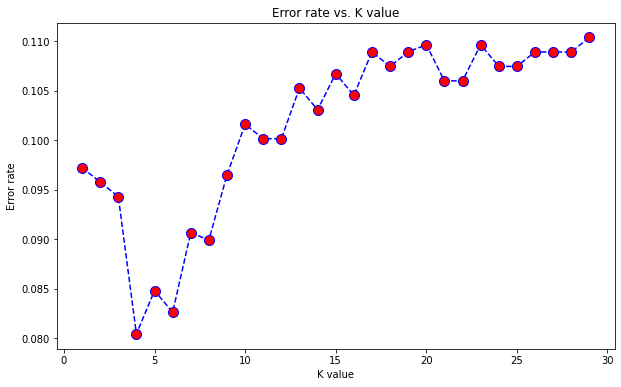

In [33]:
error2 = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    error2.append(np.mean(pred_i != y2_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,30),error2,color = "blue",
        linestyle = "dashed",marker = "o",
        markerfacecolor = "red", markersize = 10)

plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [8]:
# Find the index of minimum error in the error list
index2 = error2.index(min(error2))
k2 = index2 + 1
print(k2)

4


In [9]:
# Find the k-value with lowest Error Rate - k
# for example, k = 3
knn_2 = KNeighborsClassifier(n_neighbors=k2,
                             p =2,weights= "uniform")
knn_2.fit(X2_train,y2_train)
y_pred_test = knn_2.predict(X2_test)
print("Training Accuracy: %0.4f" % knn_2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % knn_2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % knn_2.score(X2_test, y2_test))

Training Accuracy: 0.9389
Validation Accuracy: 0.9327
Test Accuracy: 0.9196


Tuning

In [92]:
params_knn = {
    'n_neighbors': np.arange(3,8),
    'leaf_size': np.arange(20,31),
    'p': np.arange(1,3),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

knn_new2 = RandomizedSearchCV(
    estimator=knn_2,
    param_distributions=params_knn,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1,
    random_state = 123)

knn_new2.fit(X2_train, y2_train)

knn_new2.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  53.9s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  49.7s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  51.2s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  59.2s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  53.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  56.7s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  47.7s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  49.3s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=  49.2s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=6,

[CV] END leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   2.2s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   2.3s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   2.5s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   2.3s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   2.1s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   2.1s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=distance; total time=  44.1s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=distance; total time=  43.3s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=distance; total time=  43.1s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=distance; total time=  43.1s
[CV] END leaf_size=2

[CV] END leaf_size=29, metric=chebyshev, n_neighbors=6, p=2, weights=distance; total time=  53.6s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  56.5s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  54.7s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  43.6s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  55.5s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  51.0s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  47.6s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  43.5s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  43.2s
[CV] END leaf_size=25, metric=chebyshev, n_neighbors=7, p=1, weights=uniform; total time=  43.3s
[CV] END leaf_size=25, metric

0.9150773902821318

In [94]:
knn_new2.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 6,
 'metric': 'minkowski',
 'leaf_size': 20}

In [95]:
print("Training Accuracy: %0.4f" % knn_new2.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % knn_new2.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % knn_new2.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9262


Evaluation - F1 Score

In [96]:
y_true = y2_test
y_pred = knn_new2.best_estimator_.predict(X2_test)
f1_score(y_true,y_pred,average = "weighted")

0.9263178959373771

## 2. Decision Tree

Original 

In [110]:
tree2 = DecisionTreeClassifier(random_state=123) # Default parameters
tree2.fit(X2_train, y2_train)
print("Training Accuracy: %0.4f" % tree2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % tree2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % tree2.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8787


Tuning

In [111]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': np.arange(1,21)
}


tree_new2 = RandomizedSearchCV(
    estimator=tree2,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

tree_new2.fit(X2_train, y2_train)
tree_new2.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   7.9s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.3s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.1s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.1s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.2s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.4s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.1s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.4s
[CV] END max_depth=9, min_impurity_decrease=0.296815223573523, min_samples_split=10; total time=   6.1s
[

[CV] END max_depth=7, min_impurity_decrease=0.04200840080926599, min_samples_split=7; total time=  16.1s
[CV] END max_depth=7, min_impurity_decrease=0.04200840080926599, min_samples_split=7; total time=  16.7s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  18.0s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  16.8s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  17.1s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  18.0s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  15.4s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  15.6s
[CV] END max_depth=19, min_impurity_decrease=0.022138945813483468, min_samples_split=6; total time=  16.9s
[CV] END max_depth=19, min_impurity_decre

[CV] END max_depth=2, min_impurity_decrease=0.03524901297941041, min_samples_split=10; total time=  11.0s
[CV] END max_depth=2, min_impurity_decrease=0.03524901297941041, min_samples_split=10; total time=  11.2s
[CV] END max_depth=2, min_impurity_decrease=0.03524901297941041, min_samples_split=10; total time=  11.2s
[CV] END max_depth=2, min_impurity_decrease=0.03524901297941041, min_samples_split=10; total time=  11.0s
[CV] END max_depth=20, min_impurity_decrease=0.07213647211187396, min_samples_split=4; total time=  15.0s
[CV] END max_depth=20, min_impurity_decrease=0.07213647211187396, min_samples_split=4; total time=  14.9s
[CV] END max_depth=20, min_impurity_decrease=0.07213647211187396, min_samples_split=4; total time=  14.7s
[CV] END max_depth=20, min_impurity_decrease=0.07213647211187396, min_samples_split=4; total time=  14.7s
[CV] END max_depth=20, min_impurity_decrease=0.07213647211187396, min_samples_split=4; total time=  15.0s
[CV] END max_depth=20, min_impurity_decrease=0

0.884051724137931

In [112]:
tree_new2.best_params_

{'max_depth': 4,
 'min_impurity_decrease': 0.011493972900871952,
 'min_samples_split': 2}

In [113]:
print("Training Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 0.8966
Validation Accuracy: 0.8967
Test Accuracy: 0.9013


Evaluation - F1 Score

In [114]:
y_true = y2_test
y_pred = tree_new2.best_estimator_.predict(X2_test)

f1_score(y_true,y_pred,average = "weighted")

0.9017588647833643

## 3. Random Forest

Original Random Forest

In [115]:
forest2 = RandomForestClassifier(n_estimators=100,
                                random_state=123)

forest2.fit(X2_train, y2_train)
    
print("Training Accuracy: %0.4f" % forest2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % forest2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % forest2.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9444


Evaluation - F1 Score

In [117]:
y_true = y2_test
y_pred = forest2.predict(X2_test)

f1_score(y_true,y_pred,average = "weighted")

0.9443799170705982

Tuning

In [118]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': np.arange(1,21)
}

forest2_new = RandomizedSearchCV(
    estimator=forest2,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

forest2_new.fit(X2_train, y2_train)

forest2_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   7.2s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   6.3s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   6.7s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   6.7s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   6.6s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   6.6s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   6.8s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; total time=   7.0s
[CV] END max_depth=10, min_impurity_decrease=0.16090853965545632, min_samples_split=2; to

[CV] END max_depth=19, min_impurity_decrease=0.12281480687113172, min_samples_split=4; total time=   6.7s
[CV] END max_depth=19, min_impurity_decrease=0.12281480687113172, min_samples_split=4; total time=   6.7s
[CV] END max_depth=19, min_impurity_decrease=0.12281480687113172, min_samples_split=4; total time=   6.8s
[CV] END max_depth=11, min_impurity_decrease=0.4774345557102745, min_samples_split=4; total time=   3.3s
[CV] END max_depth=11, min_impurity_decrease=0.4774345557102745, min_samples_split=4; total time=   3.5s
[CV] END max_depth=11, min_impurity_decrease=0.4774345557102745, min_samples_split=4; total time=   3.5s
[CV] END max_depth=11, min_impurity_decrease=0.4774345557102745, min_samples_split=4; total time=   3.3s
[CV] END max_depth=11, min_impurity_decrease=0.4774345557102745, min_samples_split=4; total time=   3.3s
[CV] END max_depth=11, min_impurity_decrease=0.4774345557102745, min_samples_split=4; total time=   3.3s
[CV] END max_depth=11, min_impurity_decrease=0.47743

[CV] END max_depth=10, min_impurity_decrease=0.48561450916670174, min_samples_split=2; total time=   3.2s
[CV] END max_depth=10, min_impurity_decrease=0.48561450916670174, min_samples_split=2; total time=   3.2s
[CV] END max_depth=10, min_impurity_decrease=0.48561450916670174, min_samples_split=2; total time=   3.2s
[CV] END max_depth=10, min_impurity_decrease=0.48561450916670174, min_samples_split=2; total time=   3.2s
[CV] END max_depth=10, min_impurity_decrease=0.48561450916670174, min_samples_split=2; total time=   3.4s
[CV] END max_depth=14, min_impurity_decrease=0.40484898371501565, min_samples_split=2; total time=   3.3s
[CV] END max_depth=14, min_impurity_decrease=0.40484898371501565, min_samples_split=2; total time=   3.3s
[CV] END max_depth=14, min_impurity_decrease=0.40484898371501565, min_samples_split=2; total time=   3.2s
[CV] END max_depth=14, min_impurity_decrease=0.40484898371501565, min_samples_split=2; total time=   3.3s
[CV] END max_depth=14, min_impurity_decrease=0

0.8975254702194357

In [119]:
forest2_new.best_params_

{'max_depth': 15,
 'min_impurity_decrease': 0.013666043770271419,
 'min_samples_split': 2}

In [120]:
print("Training Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 0.9022
Validation Accuracy: 0.9045
Test Accuracy: 0.9042


## McNemar's Test

In [122]:
from sklearn.metrics.cluster import contingency_matrix

forest_cm = contingency_matrix(forest2.predict(X2_test), y1_test)
forest_cm

array([[434,  14,   6],
       [ 14, 417,   3],
       [ 20,  19, 441]])

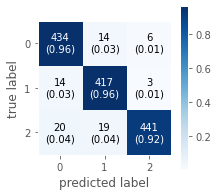

In [124]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=forest_cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.savefig("forest_cm.png")
plt.show()

## Graph

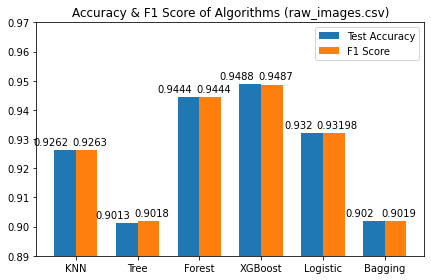

In [23]:
model_names = ['KNN', 'Tree', 'Forest','XGBoost','Logistic','Bagging']
acc = [0.9262,0.9013,0.9444,0.9488,0.932,0.902]
f1 = [0.9263,0.9018,0.9444,0.9487,0.93198,0.9019]
x = np.arange(len(model_names))
width = 0.7 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/4, acc, 0.35, label='Test Accuracy')
rects2 = ax.bar(x + width/4, f1, 0.35, label='F1 Score')

ax.set_title('Accuracy & F1 Score of Algorithms (raw_images.csv)')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/1.5, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def autolabel1(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() - rect.get_width() / 7, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel1(rects1)
autolabel(rects2)


fig.tight_layout()
plt.ylim(0.89, 0.97)
plt.savefig('Accuracy vs. F1 Score.png')
plt.show()